## CS 457 - Homework Assignment 10: Clustering
### Dua Batool

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [67]:
df = pd.read_csv('McDonaldsMenu.csv')

In [68]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


### Q1: Cleaning the Data

In [69]:
df1 = df.drop(['Category',"Item"],axis=1)

In [70]:
df1.head()

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10


### Q2: Dropping Column 'Serving Size'

In [71]:
df2 = df1.drop('Serving Size',axis=1)

In [72]:
df2.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


### Q3: Scaling the Data

In [73]:
scaler = MinMaxScaler()
# transform data
df3 = scaler.fit_transform(df2)
df3[1:15]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333


Data has been normalized as each value is between 0 and 1.

### Q4: Generating Knee Plot

In [74]:
wss_values = []  
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=99, n_init=10)  # explicitly setting n_init
    kmeans.fit(df3)
    wss_values.append(kmeans.inertia_)

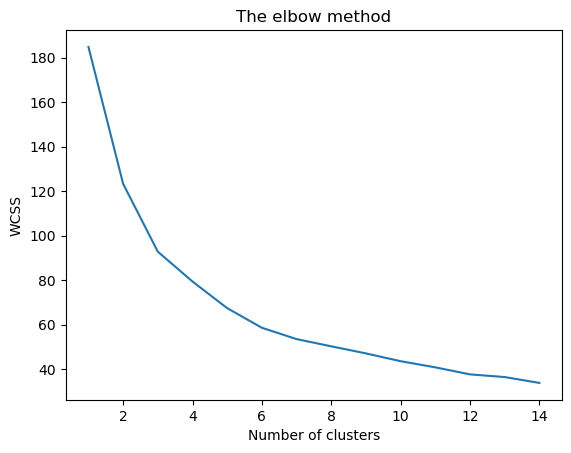

In [75]:
plt.plot(range(1, 15), wss_values)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

3 is the point where the graph stops drastically decreasing, after cluster 3 there is a steady/smooth decline. This denotes that there are three different food categories.

### Q5: Performing KMeans with optimal number of clusters

In [76]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=99, n_init=10)
Y = kmeans.fit_predict(df3)

In [77]:
Y

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2])

In [79]:
score = silhouette_score(df3, kmeans.labels_, metric="euclidean")
print("Score: ", score)

Score:  0.364195243460364


A silhouette score of 0.364 indicates poor clustering, as it is closer to 0. A higher silhouette score, closer to 1, suggests better-defined clusters. In the context of the graph, it implies that the clusters may not exhibit clear separation. This aligns with the expectation for a fast-food chain like McDonald's, where menu items are not anticipated to have significant nutritional differences, given the consistent nature of fast food offerings.

### Q6: Visualizing Clustering Results

Text(0, 0.5, 'Carbohydrates')

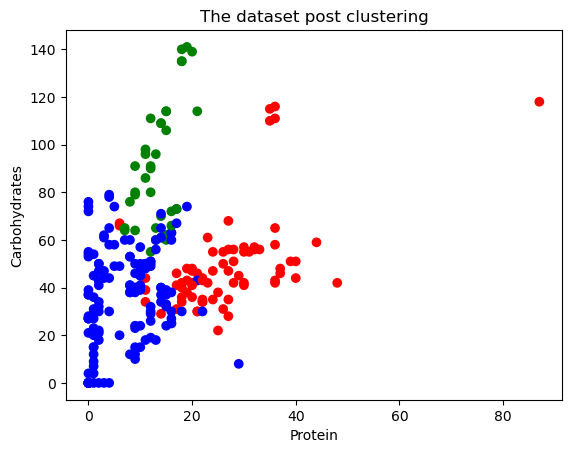

In [80]:
color2=np.array(['green','red','blue']) 
plt.scatter(x=df2.Protein,y=df2.Carbohydrates,c=color2[kmeans.labels_])
plt.title("The dataset post clustering")
plt.xlabel("Protein")
plt.ylabel("Carbohydrates")

There are three clusters: Green, Red, and Blue. The Blue cluster shows lower protein and carbohydrate levels. The Red cluster leans towards higher protein content, while the Green cluster indicates a higher carbohydrate content. For those engaging in carb loading, opting for the Green cluster may be preferable, perhaps before a marathon. Individuals in their growth phase might consider consuming more from the Yellow food category, given its essential protein for muscle development. The low silhouette score of 0.364 suggests that the clusters are not distinctly separated, reinforcing that there is not a significant distinction between them.

### Q7: Creating Cluster Specific DataFrames

In [81]:
C1 = df2.iloc[Y == 0, :]
C2 = df2.iloc[Y == 1, :]
C3 = df2.iloc[Y == 2, :]

In [82]:
C1['Protein'].mean()

13.486486486486486

<Axes: xlabel='Protein', ylabel='Count'>

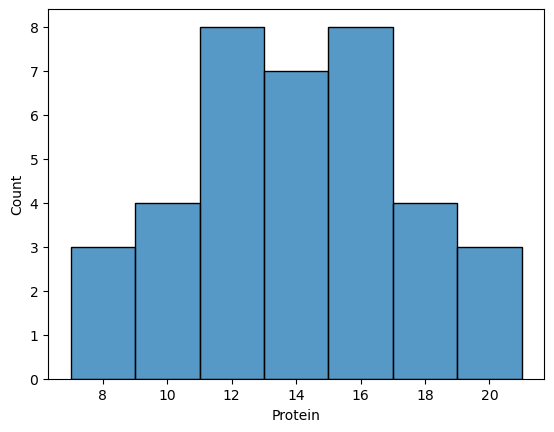

In [83]:
sns.histplot(data=C1, x='Protein')

In [84]:
C2['Protein'].mean()

26.397260273972602

<Axes: xlabel='Protein', ylabel='Count'>

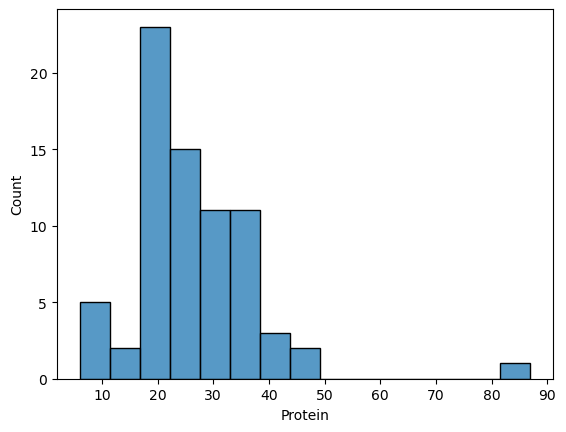

In [85]:
sns.histplot(data=C2, x='Protein')

In [86]:
C3['Protein'].mean()

6.946666666666666

<Axes: xlabel='Protein', ylabel='Count'>

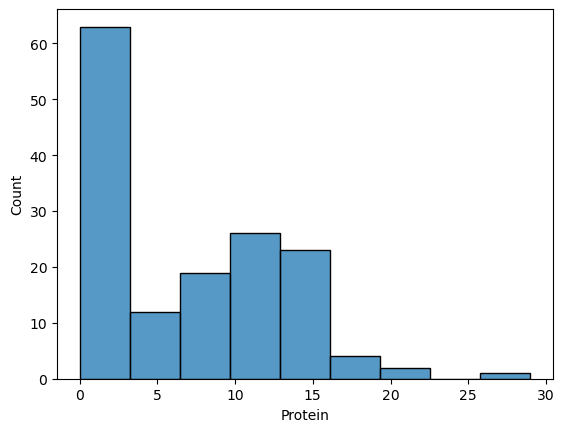

In [87]:
sns.histplot(data=C3, x='Protein')

In [88]:
C1['Carbohydrates'].mean()

89.97297297297297

<Axes: xlabel='Carbohydrates', ylabel='Count'>

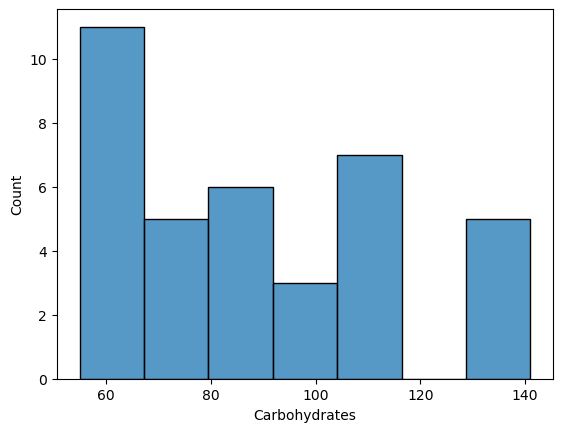

In [89]:
sns.histplot(data=C1, x='Carbohydrates')

In [90]:
C2['Carbohydrates'].mean()

50.013698630136986

<Axes: xlabel='Carbohydrates', ylabel='Count'>

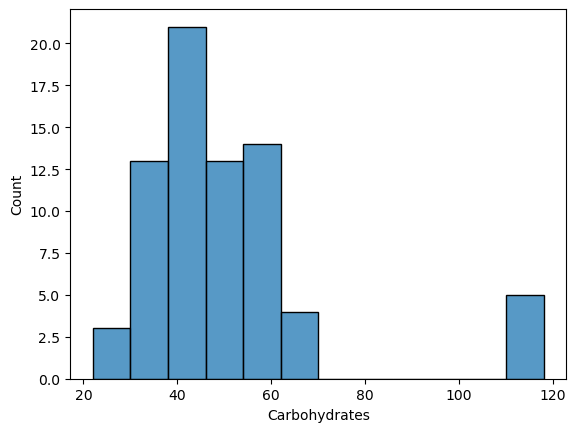

In [91]:
sns.histplot(data=C2, x='Carbohydrates')

In [92]:
C3['Carbohydrates'].mean()

35.53333333333333

<Axes: xlabel='Carbohydrates', ylabel='Count'>

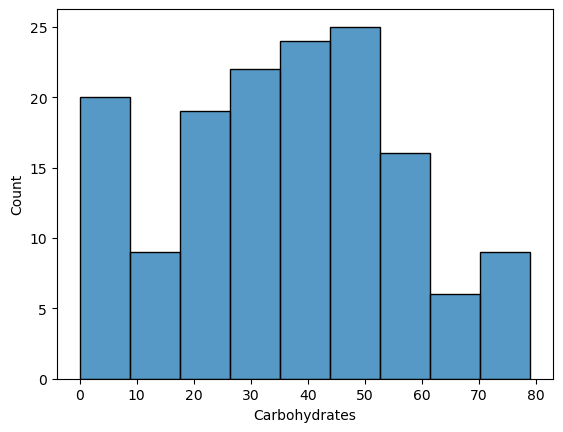

In [93]:
sns.histplot(data=C3, x='Carbohydrates')

### Q8: Generating Insights

- Cluster 2 has higher protein content. Therefore, this class of food can be taken by people who want to taken high protein in their diet. This should be consumed by people particularly those who are in their growing age (like children) and those who want to strengthen and grow their muscles (body builder) as it is an important nutritional component for growth. Protein is used for growth and repair of body tissues
- Cluster 1 has the highest amount of carbohydrates. Carbohydrates is the nutrient that provides our body energy. It is the main energy / fuel source of our body. Thus people who want more energy and have hard physical work to do, shall consume food items that lie in this food category. 
- Cluster 3 has the lowest protein content and the lowest amount of Carbohydrates among the three clusters. Usually, diet-conscious people or people who want to loose weight and who avoid consuming fats should take this food category.

### Q9: Unique Names for Clusters

- Cluster 1: Carb Loading
- Cluster 2: Body Building Diet
- Cluster 3: Low Fat Diet